In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
np.random.seed(7)
top_words = 5000 # 상위 단어 5000개
# 학습용, 검증용 5:5
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [2]:
print(len(X_train[0]))
print(len(X_train[100]))

218
158


In [3]:
#리뷰 최대 길이 설정(길이가 짧으면 공백으로 채움)
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000, 500)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [8]:
#모델생성
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
# 벡터 사이즈
embedding_vector_length = 32
model = Sequential()
# 임베딩 레이어 Embedding(단어 개수, 벡터 크기, 입력사이즈(최대단어개수)): 단어 => 숫자벡터
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
# 타임스텝 32, output 100
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#모델학습
hist = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
391/391 [==============================] - 14s 31ms/step - loss: 0.4800 - accuracy: 0.7620
Epoch 2/10
391/391 [==============================] - 12s 31ms/step - loss: 0.3098 - accuracy: 0.8766
Epoch 3/10
391/391 [==============================] - 12s 31ms/step - loss: 0.2398 - accuracy: 0.9062
Epoch 4/10
391/391 [==============================] - 12s 31ms/step - loss: 0.2643 - accuracy: 0.8945
Epoch 5/10
391/391 [==============================] - 12s 32ms/step - loss: 0.2832 - accuracy: 0.8842
Epoch 6/10
391/391 [==============================] - 13s 32ms/step - loss: 0.1923 - accuracy: 0.9266
Epoch 7/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1679 - accuracy: 0.9385
Epoch 8/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1632 - accuracy: 0.9400
Epoch 9/10
391/391 [==============================] - 12s 32ms/step - loss: 0.1470 - accuracy: 0.9454
Epoch 10/10
391/391 [==============================] - 12s 32ms/step - loss: 0.137

In [10]:
#모델평가
scores = model.evaluate(X_train, y_train, verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 8s 10ms/step - loss: 0.0916 - accuracy: 0.9702
Train Accuracy: 97.02%
782/782 [==============================] - 8s 10ms/step - loss: 0.4134 - accuracy: 0.8677
Test Accuracy: 86.77%


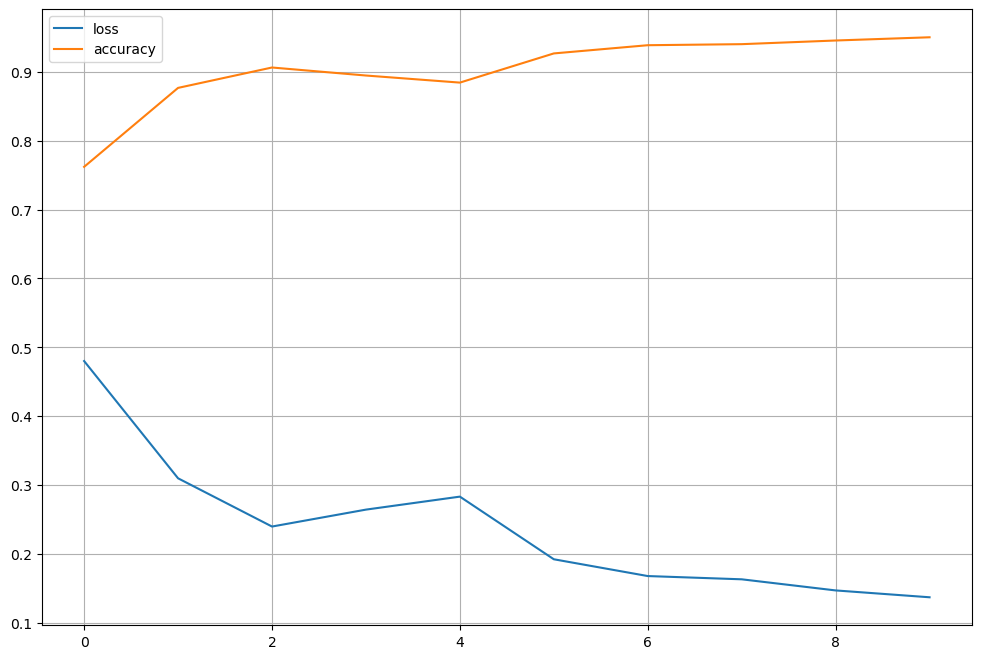

In [11]:
#모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()